In [63]:
import requests
import pandas as pd
import bs4
import json
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from geopy.geocoders import Nominatim
import folium

## Part 1

**Scraping the neighborhood data of Torronto**

In [2]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
response = requests.get(url)

In [3]:
soup = bs4.BeautifulSoup(response.text,'lxml')

In [4]:
table_contents=[]
table=soup.find('table')
for row in table.findAll('td'):
    cell = {}
    if row.span.text=='Not assigned':
        pass
    else:
        cell['PostalCode'] = row.p.text[:3]
        cell['Borough'] = (row.span.text).split('(')[0]
        cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        table_contents.append(cell)
        
df=pd.DataFrame(table_contents)

In [5]:
df.shape

(103, 3)

In [6]:
df

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government
...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East TorontoBusiness reply mail Processing Cen...,Enclave of M4L
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


## Part 2

In [7]:
import geocoder

<[REQUEST_DENIED] Google - Geocode [empty]>

**The geocoder is not working, I am proceeding with provided csv data**

In [8]:
geo_data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs_v1/Geospatial_Coordinates.csv")
geo_data

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
...,...,...,...
98,M9N,43.706876,-79.518188
99,M9P,43.696319,-79.532242
100,M9R,43.688905,-79.554724
101,M9V,43.739416,-79.588437


**I am merging the csv location data with the neighborhood data**

In [9]:
df = pd.merge(df,geo_data,left_on='PostalCode',right_on='Postal Code')

In [10]:
df = df.drop('PostalCode',axis=1)

In [11]:
df

,Borough,Neighborhood,Postal Code,Latitude,Longitude
0,North York,Parkwoods,M3A,43.753259,-79.329656
1,North York,Victoria Village,M4A,43.725882,-79.315572
2,Downtown Toronto,"Regent Park, Harbourfront",M5A,43.654260,-79.360636
3,North York,"Lawrence Manor, Lawrence Heights",M6A,43.718518,-79.464763
4,Queen's Park,Ontario Provincial Government,M7A,43.662301,-79.389494
...,...,...,...,...,...
98,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",M8X,43.653654,-79.506944
99,Downtown Toronto,Church and Wellesley,M4Y,43.665860,-79.383160
100,East TorontoBusiness reply mail Processing Cen...,Enclave of M4L,M7Y,43.662744,-79.321558
101,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",M8Y,43.636258,-79.498509


## Part 3

**Collecting data of venues from API**

In [ ]:
CLIENT_ID = 'XWOYYDBI2RCSWSQ1CHGOUKWT1TS2EEGC2DLJW4DVN2DEGQFJ' 
CLIENT_SECRET = 'SRDBKK5ORGZHI2FAOGPOFS0RG5NRKBZFW50GA5WR3JIQHHWJ'
VERSION = '20180605' 
LIMIT = 200 
RADIUS = 1000

df_venues = pd.DataFrame(columns=['Postal Code','Venue'])

for i in range(0,len(df)):
#for i in range(0,1):
    
    print(f'Loading {i}')

    neighborhood_latitude = df.loc[i, 'Latitude']
    neighborhood_longitude = df.loc[i, 'Longitude']
    neighborhood_name = df.loc[i, 'Neighborhood']
    neighborhood_code = df.loc[i, 'Postal Code']

    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        neighborhood_latitude, 
        neighborhood_longitude, 
        RADIUS, 
        LIMIT)
    
    time.sleep(1)
    response = requests.get(url)
    print(f'Response code: {response.status_code}')
    items = response.json()["response"]['groups'][0]['items']
    
    for item in items:
        venue = item['venue']['categories'][0]['name']
        df_venues = df_venues.append({'Postal Code':neighborhood_code,
                                      'Venue':venue},ignore_index=True)

In [44]:
df_venues

,Postal Code,Venue
0,M3A,Caribbean Restaurant
1,M3A,Park
2,M3A,Café
3,M3A,Grocery Store
4,M3A,Fast Food Restaurant
...,...,...
4890,M8Z,Mediterranean Restaurant
4891,M8Z,Restaurant
4892,M8Z,Pet Store
4893,M8Z,Pet Store


In [45]:
# Saving data to csv file for future use so I will not have to use API every time.
df_venues.to_csv('df_venues.csv', encoding='utf-8', index=False)

In [118]:
# one hot encoding
torronto_onehot = pd.get_dummies(df_venues['Venue'], prefix="", prefix_sep="")

In [119]:
# adding the Postal Code to the one-hot encoded dataframe
torronto_onehot['Postal Code'] = df_venues['Postal Code']

In [120]:
# grouping the venues by postal code
torronto_grouped = torronto_onehot.groupby('Postal Code').sum().reset_index()

**Clustering the data using Kmeans**

In [121]:
from sklearn.cluster import KMeans
no_clusters = 3
X = torronto_grouped.drop('Postal Code', 1)
kmeans = KMeans(n_clusters=no_clusters, random_state=0).fit(X)

In [122]:
#inserting the clusters label into dataframe
torronto_grouped.insert(0, 'Cluster Labels', kmeans.labels_)

In [123]:
#adding the location data into the dataframe
venues_merged = pd.merge(df,torronto_grouped,left_on='Postal Code',right_on='Postal Code')

**Plotting the neiborhood locations on the map**

In [124]:
# create map
map_clusters = folium.Map(location=[torronto_latitude, torronto_longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(no_clusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(venues_merged['Latitude'], venues_merged['Longitude'], venues_merged['Neighborhood_x'], venues_merged['Cluster Labels']):
    label = folium.Popup(str(poi), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<img src="2021-07-25 16_39_52-MessageCenterUI.png">

**Plotting the heatmap of the venues**

In [125]:
venues_merged = venues_merged.sort_values('Cluster Labels')

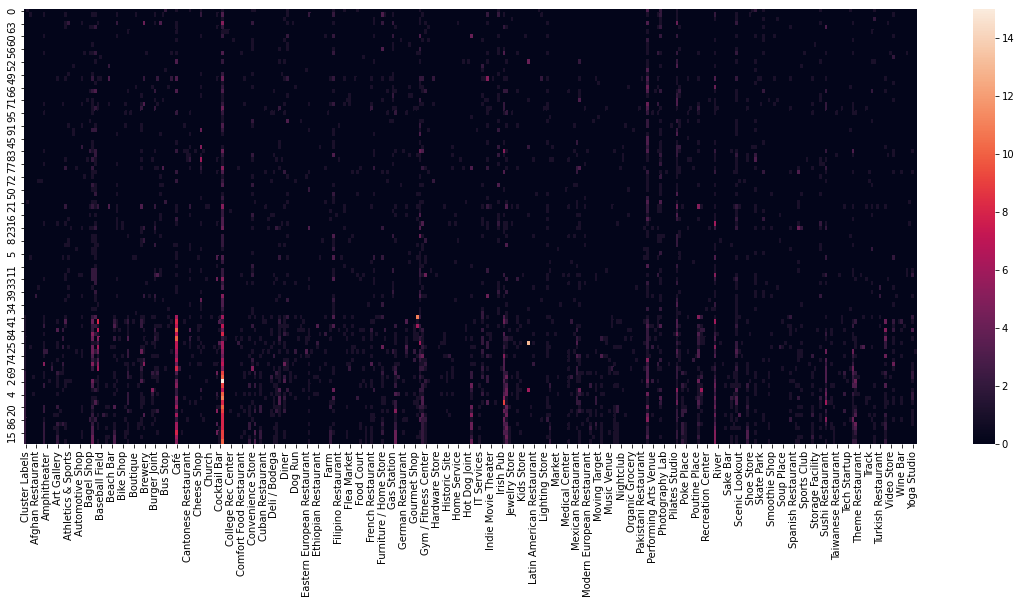

In [126]:

plt.figure(figsize=(20,8))
sns.heatmap(venues_merged.drop(['Borough','Neighborhood_x','Postal Code','Latitude','Longitude'],axis=1));

### Interesting discovery:
**Willowdale South neighbourhood which is not in downtown has simmilar ammount and category of venues as lecations in downtown. I would be looking for apartments there in case of Data Science job in Torronto :)**